# 머신러닝 문장분류

<iframe style="border:none" width="800" height="450" src="https://whimsical.com/embed/RCCrWptFJ2dx7Y4uDUG4XT"></iframe>

[한국어 시재](https://ratsgo.github.io/korean%20linguistics/2017/11/03/tense/)<br>
[한국어의 문법적 잉태](https://ratsgo.github.io/korean%20linguistics/2017/11/17/modality/)

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

plt.rc('font', family='AppleGothic') # For MacOS
print(plt.rcParams['font.family'])

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'


['AppleGothic']


In [111]:
sentence_df = pd.read_csv('../open/train.csv')
sentence_df

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [112]:
sentence_df['유형'].value_counts()

사실형    13558
추론형     2151
대화형      575
예측형      257
Name: 유형, dtype: int64

In [113]:
sentence_df['극성'].value_counts()


긍정    15793
부정      565
미정      183
Name: 극성, dtype: int64

In [114]:
sentence_df['시제'].value_counts()


과거    8032
현재    6866
미래    1643
Name: 시제, dtype: int64

In [115]:
sentence_df['확실성'].value_counts()

확실     15192
불확실     1349
Name: 확실성, dtype: int64

In [116]:
sentence_df.isnull().sum()

ID       0
문장       0
유형       0
극성       0
시제       0
확실성      0
label    0
dtype: int64

In [117]:
sentence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      16541 non-null  object
 1   문장      16541 non-null  object
 2   유형      16541 non-null  object
 3   극성      16541 non-null  object
 4   시제      16541 non-null  object
 5   확실성     16541 non-null  object
 6   label   16541 non-null  object
dtypes: object(7)
memory usage: 904.7+ KB


## WordCloud로 자주 나오는 단어 확인

### 유형별로 문장 분류

In [125]:
types = sentence_df['유형'].unique().tolist()
type_sort_dict = dict()
for t in types:
    type_sort_dict[t] = sentence_df[sentence_df['유형']==t].reset_index(drop=True)
    print(f'{t}: {len(type_sort_dict[t])}')

사실형: 13558
추론형: 2151
예측형: 257
대화형: 575


### DataFrame -> string 함수

In [126]:
import re
from konlpy.tag import Okt

# def df_to_str(df):
#     str_lst = df['문장'].tolist()
#     str_final = ' '.join(str_lst)
#     return str_final

def df_to_str(df):
    str_lst = df['문장'].tolist()
    split_str_lst = []
    for st in str_lst:
        token = [tok[0] for tok in Okt().pos(st)]
        split_st = ' '.join(token)
        # print(split_st)
        split_str_lst.append(split_st)
    str_final = ' '.join(split_str_lst)
    return str_final


In [127]:


# 출저: https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/#2-데이터셋-살펴보기
def apply_regular_expression(text):
    hangul = re.compile('[^가-힣\s!?]|\(.*?\)')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

# apply_regular_expression(df_to_str(type_sort_dict['사실형']))[:400]

In [124]:
len(df_to_str(sentence_df[sentence_df['유형'] == '사실형']))

1084827

### Wordcloud 그리기


## 불용어 설정

In [137]:
# stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt", header=None)[0].tolist()
# stopwords.extend(['은', '는', '도', '한', '이다'])
stopwords = ['은', '는', '도', '한', '이다', '을', '이', '를', '가', '에', '의', '과', '에서', '으로', '들', '로', '와', '등']

/var/folders/jt/n2n3tkp50_5g28q3q_g8rjdr0000gn/T/ipykernel_13346/81564990.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


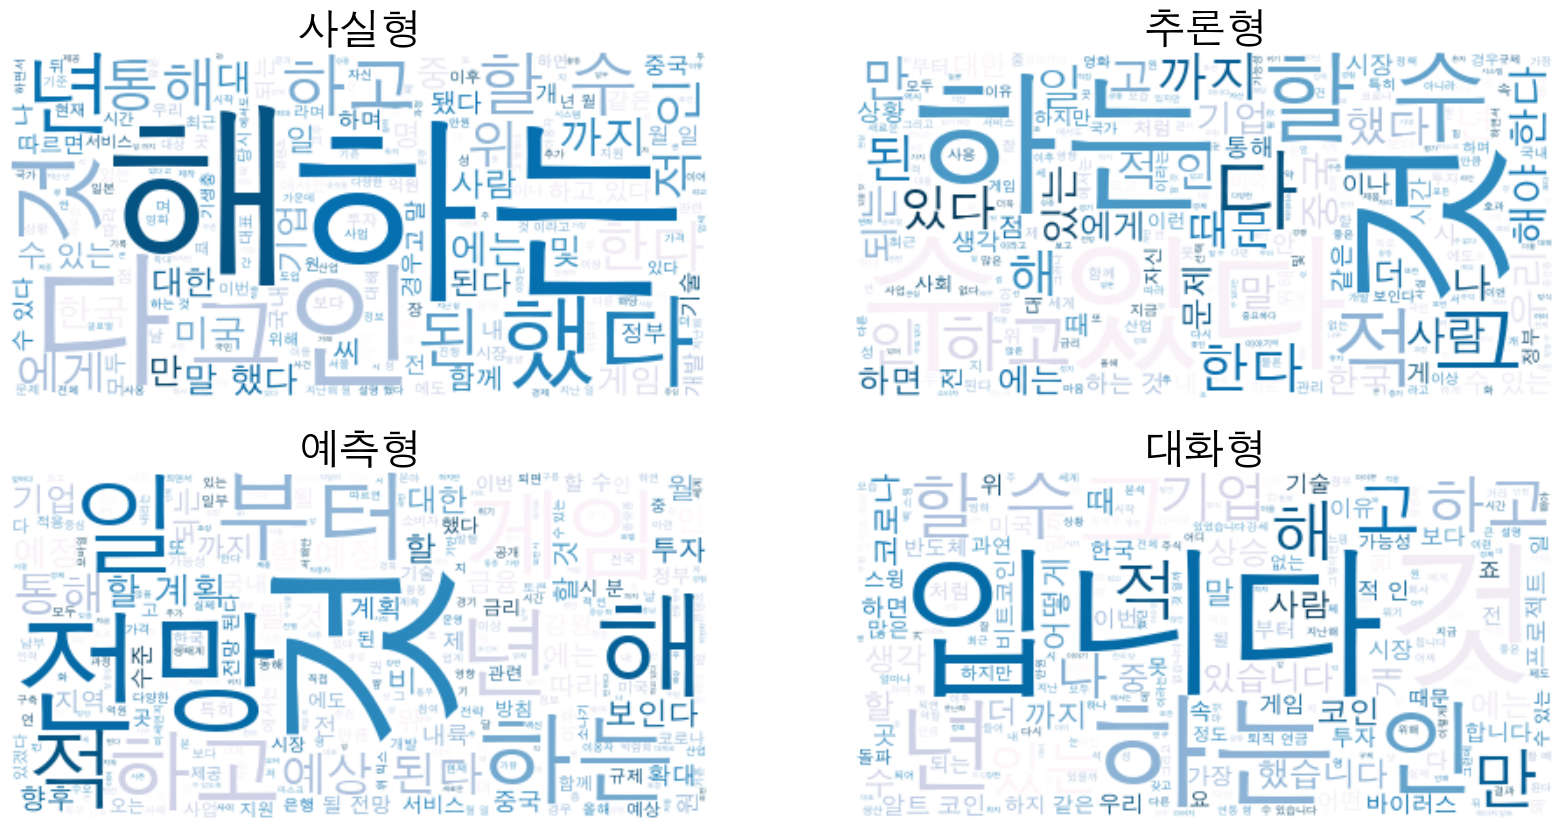

In [138]:
from wordcloud import WordCloud

type_class = sentence_df['유형'].unique().tolist()


wc = WordCloud(background_color='white', 
               max_words=2000,
               stopwords=stopwords,
              font_path = font_path,
              colormap='PuBu')

fig, axs = plt.subplots(2, 2, figsize=(20,10))

font_size = 30

wc_0 = wc.generate(apply_regular_expression(df_to_str(type_sort_dict[type_class[0]])));
axs[0, 0].imshow(wc_0, interpolation='bilinear');
axs[0, 0].set_title(type_class[0], fontsize = font_size)
axs[0, 0].axis('off')

wc_1 = wc.generate(apply_regular_expression(df_to_str(type_sort_dict[type_class[1]])));
axs[0, 1].imshow(wc_1, interpolation='bilinear');
axs[0, 1].set_title(type_class[1], fontsize = font_size)
axs[0, 1].axis('off')

wc_2 = wc.generate(apply_regular_expression(df_to_str(type_sort_dict[type_class[2]])));
axs[1, 0].imshow(wc_2, interpolation='bilinear');
axs[1, 0].set_title(type_class[2], fontsize = font_size)
axs[1, 0].axis('off')

wc_3 = wc.generate(apply_regular_expression(df_to_str(type_sort_dict[type_class[3]])));
axs[1, 1].imshow(wc_3, interpolation='bilinear');
axs[1, 1].set_title(type_class[3], fontsize = font_size)
axs[1, 1].axis('off')

fig.savefig('./wordcloud.png')
fig.show();


## 전처리

### 문장 살피며 각 유형 특성 파악하기

In [101]:
import random
for ty in types:
    random_idx = random.randint(0, len(type_sort_dict[ty])-1)
    print(f"{ty}: {type_sort_dict[ty]['문장'][random_idx]}")
    # print(f"{ty}: {' '.join(type_sort_dict[ty]['문장'][random_idx].split()[-2:])}")
    

사실형: 그러다보니 농간을 부린 아전과 그의 가족이 무참히 살해되는 사건도 종종 발생했다.
추론형: 두 토끼를 다 잡을 것처럼 말하는 건 요행을 바라는 허풍이다.
예측형: 인플레이션 공포가 스태그플레이션으로 옮겨 붙으면서 당분간 주식·채권·외환 시장 모두 약세장을 면치 못할 것으로 예상된다.
대화형: 매일 솜씨 좋은 정원사가 가위질을 해도 어찌 저런 단정함이 나올 수 있을까?


- 특징적, 자주 나오는 단어:
  - 사실형: ~있다, ~했다, ~이다, ~인다, 
  - 추론형: ~야 한다, ~으로 봤다, ~수 있다, ~것이다, ~때문이다, ~지도 모른다
  - 예측형: 전망이다, 있겠다, ~보인다, ~하겠다, ~예정이다, 전망한다, 전망된다, 기대된다
  - 대화형: ~하라, ~입니다, ~습니다, ~바랍니다, 있었죠, 되나, 말이죠, ~일까?
<br><br>

- 문장 끝에 유형의 정보가 많이 심어져 있음 
- 예측형에는 전망, 예정 등의 단어를 잘 포착하도록, 예정이다, 전망한다 등의 단어를 어미와 분리시켜야 할것 같다.
- 다른 문장 유형과는 다르게 대화형에는 "다"로 끝나지 않는 문장이 많다.
- 물음표가 나오면 대화형일 가능성이 큼. 무조건적으로 문장부호를 제거하면 안될듯

- 추가로 생각해볼 점
  - 고유명사(미국, 코로나)등을 꼭 분석에 추가할 필요는 없을듯? -> 문장 유형은 문장 전체의 구조에서 판단되기 때문에 
    - 예시: ____에 가면 보통 ____하니까 ____할 것이다.
      - 어떤 단어가 들어와도 예측형이라는 사실은 변하지 않음

## 유형분석

- 유형분석에서는 문장의 종결 어미를 분석하는것이 중요 ([한국어 어미 종류](https://m.blog.naver.com/zzangdol57/30169103790))
- Okt는 어미를 너무 포괄적으로 분석해줌 (Eomi) ([Konlpy tag comparison](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0))
- Kkma는 많이 느림
- Mecab는 속도도 빠르고, 어미도 세밀하게 분석해줌([speed chart](https://konlpy.org/en/v0.4.4/morph/))

|tag|name|
|--|--|
|NNG	|일반 명사|
|NNP	|고유 명사|
|NNB	|의존 명사|
|NNBC|	단위를 나타내는 명사|
|NR	|수사|
|NP	|대명사|
|VV	|동사|
|VA	|형용사
|VX	|보조 용언|
|VCP|	긍정 지정사|
|VCN|	부정 지정사|
|MM	|관형사|
|MAG|	일반 부사|
|MAJ|	접속 부사|
|IC	|감탄사|
|JKS|	주격 조사|
|JKC|	보격 조사|
|JKG|	관형격 조사|
|JKO|	목적격 조사|
|JKB|	부사격 조사|
|JKV|	호격 조사|
|JKQ|	인용격 조사|
|JC	|접속 조사|
|JX	|보조사|
|EP	|선어말어미|
|EF	|종결 어미|
|EC	|연결 어미|
|ETN|	명사형 전성 어미|
|ETM|	관형형 전성 어미|
|XPN|	체언 접두사	|
|XSN|	명사파생 접미사|
|XSV|	동사 파생 접미사|
|XSA|	형용사 파생 접미사|
|XR	|어근|
|SF	|마침표, 물음표, 느낌표|
|SE	|줄임표 …|
|SSO|	여는 괄호 (, [|
|SSC|	닫는 괄호 ), ]|
|SC	|구분자 , · / :|
|SY	|기타 기호|
|SH	|한자|
|SL	|외국어|
|SN	|숫자|

In [102]:
from konlpy.tag import Okt, Mecab
from collections import Counter
sent = '지난해 상반기 이후 불과 1년 만에 총 35계단을 수직 상승하는 등 같은 기간 76개 평가 도시 중 가장 많이 순위를 끌어올렸다.'
Okt().pos(sent)

[('지난해', 'Noun'),
 ('상반기', 'Noun'),
 ('이후', 'Noun'),
 ('불과', 'Noun'),
 ('1년', 'Number'),
 ('만에', 'Josa'),
 ('총', 'Noun'),
 ('35', 'Number'),
 ('계단', 'Noun'),
 ('을', 'Josa'),
 ('수직', 'Noun'),
 ('상승', 'Noun'),
 ('하는', 'Verb'),
 ('등', 'Noun'),
 ('같은', 'Adjective'),
 ('기간', 'Noun'),
 ('76', 'Number'),
 ('개', 'Noun'),
 ('평가', 'Noun'),
 ('도시', 'Noun'),
 ('중', 'Noun'),
 ('가장', 'Noun'),
 ('많이', 'Adverb'),
 ('순위', 'Noun'),
 ('를', 'Josa'),
 ('끌어', 'Verb'),
 ('올렸다', 'Verb'),
 ('.', 'Punctuation')]

In [61]:
tags = Mecab().pos(sent)
tags
# ' '.join([word_tag[0] for word_tag in tags if word_tag[-1].split('+')[-1][0]=='E'])

[('지난해', 'NNG'),
 ('상반기', 'NNG'),
 ('이후', 'NNG'),
 ('불과', 'MAG'),
 ('1', 'SN'),
 ('년', 'NNBC'),
 ('만', 'NNB'),
 ('에', 'JKB'),
 ('총', 'MM'),
 ('35', 'SN'),
 ('계단', 'NNG'),
 ('을', 'JKO'),
 ('수직', 'NNG'),
 ('상승', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('등', 'NNB'),
 ('같', 'VA'),
 ('은', 'ETM'),
 ('기간', 'NNG'),
 ('76', 'SN'),
 ('개', 'NNBC'),
 ('평가', 'NNG'),
 ('도시', 'NNG'),
 ('중', 'NNB'),
 ('가장', 'MAG'),
 ('많이', 'MAG'),
 ('순위', 'NNG'),
 ('를', 'JKO'),
 ('끌어올렸', 'VV+EP'),
 ('다', 'EF'),
 ('.', 'SF')]

### 문장 클렌징
- 정규표현식(regex)로 문장 클렌징
- 느낌표, 물음표를 제외한 나머지 문장부호, 숫자, 괄호 안에 있는 부분 제거

In [67]:
import re

sentence = "\"한국게임미디어협회(KGMA) 신년기획 10부작 게임질병 코드 어떻게 볼 것인가 1부, 왜 게임은 탄압받는가?\""

cleaned_sentence = re.sub(r"[^가-힣\s!?]|\(.*?\)", "", sentence)
print(cleaned_sentence)


한국게임미디어협회 신년기획 부작 게임질병 코드 어떻게 볼 것인가 부 왜 게임은 탄압받는가?


In [260]:
# regex 함수
def regex_filter(sentence):
    return re.sub(r"[^가-힣\s!?]|\(.*?\)", "", sentence)

sentence_df['문장'] = sentence_df['문장'].apply(regex_filter)

In [261]:
sentence_df

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,포인트 금리 인상은 년 이후 년 만에 처음이다,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정이라며 그 이전이라도 방...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 월부터 연말까지 유류세 인하 폭을 에서 까지 확대한다,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,서울시는 올해 월 즉시 견인 유예시간 분을 제공하겠다고 밝혔지만 하루 만에 차도와 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,신동덤은 신비한 동물사전과 해리 포터 시리즈를 잇는 마법 어드벤처물로 전편에 이어 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목 어깨 팔꿈치 등 허...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 고...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,만명이 넘는 방문자수를 기록한 이번 전시회는 총 개 작품을 넥슨 사옥을 그대로 구현...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [69]:
from konlpy.tag import Mecab

a = Mecab().pos('한국게임미디어협회 신년기획 부작 게임질병 코드 어떻게 볼 것인가 부 왜 게임은 탄압받는가?')
[tok[0] for tok in a]

['한국',
 '게임',
 '미디어',
 '협회',
 '신년',
 '기획',
 '부작',
 '게임',
 '질병',
 '코드',
 '어떻게',
 '볼',
 '것',
 '인가',
 '부',
 '왜',
 '게임',
 '은',
 '탄압',
 '받',
 '는가',
 '?']

## TF_IDF

In [262]:
#Vectorizer에 넣을 custom_tokenizer 출력값 모양 어떤식으로 해야하는 지 확인해보기

# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.stem.porter import PorterStemmer
# import nltk 
# import pandas as pd
# import string
# stemmer = PorterStemmer()
# the_things = [
#         ('items-translated', 'item_name_translated', 50),
#         ('item_categories-translated','item_category_name_translated', 10),
#         ('shops-translated','shop_name_translated', 10)]

# trans_table = {ord(c): None for c in string.punctuation + string.digits}   

# def tokenize(text):
#         # my text was unicode so I had to use the unicode-specific translate function. If your documents are strings, you will need to use a different `translate` function here. `Translated` here just does search-replace. See the trans_table: any matching character in the set is replaced with `None`
#         tokens = [word for word in nltk.word_tokenize(text.translate(trans_table)) if len(word) > 1] #if len(word) > 1 because I only want to retain words that are at least two characters before stemming, although I can't think of any such words that are not also stopwords
#         stems = [stemmer.stem(item) for item in tokens]
#         return stems

# tokenize('hello world!')

- TF-IDF 중요도 수정
  - 

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def custom_tokenizer(sentence):
    '''
    각 문장을 Mecab을 이용하여 토큰화해줄 함수
    토큰들을 리스트 형식으로 반환
    '''
    t= Mecab()
    return [token[0] for token in t.pos(sentence)]

In [71]:

vectorizer_tf = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=1, max_df=0.8)

corpus = sentence_df['문장'].tolist()

In [72]:
X = vectorizer_tf.fit_transform(corpus)

In [73]:
X.shape

(16541, 28682)

In [267]:
corpus_X = pd.DataFrame(X.toarray(), columns=vectorizer_tf.get_feature_names_out())
corpus_X

,!,?,가,가가호호,가감,가게,가격,가격대,가결,가계,...,힘센,힘써야,힘썼,힘썼으며,힘쓰,힘쓸,힘없이,힘입,힘차,힙
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.068230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.196372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16536,0.0,0.0,0.058921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16537,0.0,0.0,0.048148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16538,0.0,0.0,0.055079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16539,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
# 각 문장에서 컬럼 값이 0이 아닌 갯수
corpus_X.astype(bool).sum(axis=1)

0        11
1        41
2        17
3        31
4        18
         ..
16536    35
16537    49
16538    33
16539    31
16540     5
Length: 16541, dtype: int64

In [269]:
vectorizer_tf.transform(['그럴 것 같습니다'])

<1x26090 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

## 데이터 나누기

In [270]:
from sklearn.model_selection import train_test_split

corpus_y = sentence_df['유형']

X_train, X_valid, y_train, y_valid = train_test_split(corpus_X, corpus_y, test_size=0.2, random_state=13, stratify=corpus_y)
X_train.shape, y_train.shape

((13232, 26090), (13232,))

In [271]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

## 성능 측정

In [272]:
from sklearn.metrics import accuracy_score
pred = naive.predict(X_valid)
accuracy_score(pred, y_valid)


0.8192807494711393

In [273]:
wrong_answer_idx = []
for i in range(len(pred)):
    if pred[i] != y_valid.iloc[i]:
        
        print(f"문장: {i} - {sentence_df.iloc[i]['문장']}")
        print(f"정답: {y_valid.iloc[i]}")
        print(f"예측: {pred[i]}")
        print()
        wrong_answer_idx.append(i)




문장: 1 - 이어 앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정이라며 그 이전이라도 방역 지표가 기준을 충족하면 확진자 격리의무 조정 여부를 검토할 것이라고 전했다
정답: 추론형
예측: 사실형

문장: 5 - 이같은 변화를 포함해 올해 종부세 과세 대상은 당초 만명에서 만명으로 줄어든다는 게 정부 추산이다
정답: 추론형
예측: 사실형

문장: 19 - 교리를 중시하는 보수주의자와 세상의 변화를 받아들이자는 진보주의자는 사사건건 의견 충돌을 빚지만 결국 가톨릭 전체를 위해 각자 어떤 역할을 해야 하는지에 대해 합의를 이루고 두 사람은 서로를 위해 기도해주는 친구가 된다
정답: 추론형
예측: 사실형

문장: 22 - 능양군이 막 문을 나서자 김류의 부인이 나와 지난 밤 꿈에 어가가 집을 나가는 것을 보았는데 곤룡포를 입은 분이 아까 오셨던 젊은 분이라고 귀띔했다
정답: 추론형
예측: 사실형

문장: 25 - 양 지사는 해양 생태 복원 한국형 해양치유산업 해양바이오산업 해양레저관광산업을 전략적으로 추진해 일자리 만개 기업 개 생산 조원 유발 관광객 연 만명 방문 등을 목표로 세웠다고 밝혔다
정답: 추론형
예측: 사실형

문장: 26 - 해당 시민은 김현미 의원님 고양시 안망쳐 졌어요 고양시라고 말하자 김 장관은 그동안 동네 물이 많이 나빠졌네라고 말했다
정답: 추론형
예측: 사실형

문장: 32 - 팔각정은 관광도로로 유명한 북악 스카이웨이로 인근에 있어 이륜차 운전자들이 즐겨 찾는 장소로 꼽힌다
정답: 추론형
예측: 사실형

문장: 34 - 이번 폐간에는 유튜브 페이스북 등 모바일 디지털 플랫폼의 부상이 크게 작용했다
정답: 추론형
예측: 사실형

문장: 41 - 구강 관리 역시 중요하다
정답: 대화형
예측: 사실형

문장: 45 - 월드 오브 드래곤네스트는 오는 일 말레이시아 싱가포르 인도네시아 필리핀 태국 등 개 국가에 동시 출시될 예정이며 감마니아를 통해 대만 지역 출시도 준비 중이다
정답: 추론형
예측: 사실형

문장: 54 - 봄이 오면 봄 상

## 데이터 불균형 문제
- 원본 데이터가 많이 불균형함
- 조사 결과, SMOTE는 차원이 아주 높은 데이터에는 잘 적용이 안됨.
  - 데이터 증량
    - 문장의 명사들을 바꿔주며 새로운 문장을 만들어, 수가 가장 많은 클래스와 수를 맞추기
    - [명사 리스트 출저](https://m.blog.naver.com/kkson50/120181737992)

In [274]:

korean_noun = pd.read_excel('../korean_noun_lst.xls')
korean_noun.drop(columns=['번호', '의미', 'Unnamed: 4'], inplace=True)
korean_noun = korean_noun[korean_noun['품사']=='명사']
korean_noun = [regex_filter(s) for s in korean_noun['형태'].tolist()] # 몇몇 데이터에 있는 숫자 regex로 제거해주기
korean_noun

['가게',
 '가격',
 '가구',
 '가방',
 '가수',
 '가슴',
 '가요',
 '가운데',
 '가위',
 '가을',
 '가족',
 '간식',
 '간장',
 '간호사',
 '갈비',
 '갈비탕',
 '갈색',
 '감',
 '감기',
 '감동',
 '감자',
 '값',
 '강',
 '강아지',
 '개',
 '개나리',
 '개인',
 '거리',
 '거실',
 '거울',
 '거짓말',
 '건너편',
 '건물',
 '검은색',
 '게임',
 '겨울',
 '결과',
 '결혼식',
 '경기',
 '경기장',
 '경복궁',
 '경주',
 '경찰',
 '경찰관',
 '경찰서',
 '경치',
 '경험',
 '계단',
 '계란',
 '계절',
 '계획',
 '고기',
 '고등학교',
 '고등학생',
 '고모',
 '고모부',
 '고속버스',
 '고양이',
 '고장',
 '고추',
 '고추장',
 '고향',
 '골목',
 '골프',
 '곳',
 '공',
 '공간',
 '공기',
 '공무원',
 '공연',
 '공원',
 '공중전화',
 '공짜',
 '공책',
 '공항',
 '공휴일',
 '과',
 '과거',
 '과일',
 '과자',
 '과학',
 '관계',
 '관심',
 '광고',
 '교과서',
 '교수',
 '교실',
 '교통',
 '교통사고',
 '교회',
 '구두',
 '구름',
 '구월',
 '국',
 '국내',
 '국립',
 '국수',
 '국어',
 '국적',
 '국제',
 '군인',
 '귀',
 '규칙',
 '귤',
 '그날',
 '그동안',
 '그때',
 '그램',
 '그릇',
 '그림',
 '그저께',
 '극장',
 '근처',
 '글',
 '금연',
 '금요일',
 '기간',
 '기름',
 '기분',
 '기사',
 '기사',
 '기숙사',
 '기온',
 '기자',
 '기차',
 '기침',
 '기타',
 '길',
 '김밥',
 '김치',
 '김치찌개',
 '김포공항',
 '까만색',
 '껌',
 '꽃',
 '꽃집',
 '꿈',
 '끝',
 '나라',
 '나무'

In [275]:
from sklearn.model_selection import train_test_split

sentence_df_type = sentence_df[['문장', '유형']]
corpus_y = sentence_df_type['유형']

X_train, X_valid, y_train, y_valid = train_test_split(sentence_df_type, corpus_y, test_size=0.2, random_state=13, stratify=corpus_y)
X_train.shape, y_train.shape

((13232, 2), (13232,))

In [276]:
X_valid

,문장,유형
9329,그러나 이런 불편함에도 불구하고 궁궐을 작게 지은 다른 이유도 있다,사실형
11197,이 때문에 평소 만성기침을 앓고 있는 신순범 씨는 집 밖을 나서기가 두렵다,추론형
3076,저출산 고령화 현상이 가속화되면서 인구 절벽이 현실화하고 있는 것이다,사실형
3947,하지만 변종 바이러스들을 한 번에 다스릴 치료법은 갈 길이 멀다,사실형
13181,음식과 남녀의 교정은 사람들의 큰 욕망인데 지금 색을 모르는 사람이 셋 있다,사실형
...,...,...
14794,반발을 누그러뜨리기 위해 미래통합당은 비례대표 순번을 조정한 이유에 대한 합리적인 ...,추론형
15656,반면 개인은 삼성전자를 대거 매수했다,사실형
15270,최대 에다나 주화 개 광원석 파편 만개 태고 등급 룬을 획득할 수 있다,사실형
11969,문재인정부 역시 복잡계의 격변에 대응하는 시스템에 구멍이 숭숭 뚫려 있음을 뼈아프게...,추론형


In [277]:
import random
import re
from konlpy.tag import Okt
from tqdm.notebook import tqdm
# from pykospacing import Spacing

t = Okt()
random.seed(10)

def change_noun(df):
    '''
    input: 
        - df: 원하는 문장유형의 문장만 필터링된 DataFrame
    output:
        - 원하는 문장유형의 명사 몇몇만 바뀐 새로운 문장
    '''

    idx = random.randint(0, len(df)-1)
    sentence = df.iloc[idx]['문장']

    new_sentence = ''
    
    token = t.pos(sentence)
    noun_position = [i for i in range(len(token)) if token[i][1] == 'Noun']
    if len(noun_position) < 2:
        return sentence
    else:
        noun_position = noun_position[:-1]

    space_position = []
    # 띄어쓰기 위치 기억하기
    for i in range(len(token)):
        if token[i][0] in ['?', '!']:
            continue
        space_idx = re.search(token[i][0], sentence).start()-1
        if sentence[space_idx] == ' ' and space_idx != -1:
            space_position.append(i)

    final_noun_position = random.choices(noun_position, k=random.randint(1, len(noun_position)))

    for i in range(len(token)):
        new_noun = korean_noun[random.randint(0, len(korean_noun)-1)]

        if i in final_noun_position:
            if i in space_position:
                new_sentence += ' '
            new_sentence += new_noun
        else:
            if i in space_position:
                new_sentence += ' '
            new_sentence += token[i][0]

    return new_sentence

In [278]:
'''
사실형    13558
추론형     2151
대화형      575
예측형      257
'''


max_num = X_train['유형'].value_counts().max()
max_val = X_train['유형'].value_counts().idxmax()

for types in X_train['유형'].unique():
    if types == max_val:
        continue
    
    new_sentence_lst = []
    df = X_train[X_train['유형']==types]
    type_len = len(df)
    for _ in tqdm(range(max_num - type_len)):
        new_sentence_lst.append(change_noun(df))
    
    new_sentence_df = pd.DataFrame({'문장': new_sentence_lst,
                                    '유형': types})
    
    X_train = pd.concat([X_train, new_sentence_df], ignore_index=True)


  0%|          | 0/9125 [00:00<?, ?it/s]

  0%|          | 0/10386 [00:00<?, ?it/s]

  0%|          | 0/10641 [00:00<?, ?it/s]

In [279]:
len(X_train)

43384

In [280]:
X_train

,문장,유형
0,할리우드를 꿈꾸며 큰 시네키즈 봉준호를 이제 할리우드가 동경한다,사실형
1,머플러에서 검은 그을림이 묻어 나오면 연료 종류와 상관없이 엔진 이상이며 가솔린차는...,추론형
2,흔히 조선인은 게으르고 무디고 어리석고 느리고 열등한 민족이라고 말한다,사실형
3,일 농식품부는 오는 일부터 전국 이마트 롯데마트 홈플러스 농협하나로유통 더프레시 매...,사실형
4,이랜드 스파오는 반영구적인 폴리에스터 소재인 아스킨 원사를 써 접촉 냉감이 특히 높...,사실형
...,...,...
43379,아이스크림 수건 플랫폼에 여종의 능력을 선보일 계획이다,예측형
43380,기상청은 이날 서해 중부 해상에 위치한 매일의 가장자리에 들어 전국 이 대체로 흐리...,예측형
43381,양배추도 에 원으로 평년 원 대비 일본 풀할 것으로 전망했다,예측형
43382,김포공항가 핸드폰 클라우드와 두레이 서비스를 경험해볼 수 있는 삼거리 기자도 준비될...,예측형


In [281]:
y_train = X_train['유형']

In [282]:
X_train['유형'].value_counts()

사실형    10846
추론형    10846
대화형    10846
예측형    10846
Name: 유형, dtype: int64

In [283]:
vectorizer_tf = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=1, max_df=0.8)

corpus = X_train['문장'].tolist()
X_train_tf = vectorizer_tf.fit_transform(corpus)



In [284]:
X_train_tf = pd.DataFrame(X.toarray(), columns=vectorizer_tf.get_feature_names_out())
X_train_tf

ValueError: Shape of passed values is (16541, 26090), indices imply (16541, 26017)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve

X_valid_tf = vectorizer_tf.transform(X_valid['문장'])
X_valid_tf

<3309x31223 sparse matrix of type '<class 'numpy.float64'>'
	with 68549 stored elements in Compressed Sparse Row format>

In [ ]:

pred = naive.predict(X_valid_tf)
accuracy_score(pred, y_valid)
print('NB accuracy_score : ', accuracy_score(y_valid, pred))
print('NB f1_score : ', f1_score(y_valid, pred, average='weighted'))

NB accuracy_score :  0.7781807192505289
NB f1_score :  0.7919213903061609


/Users/seungbeomha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [ ]:
wrong_answer_idx = []
for i in range(len(pred)):
    if pred[i] != y_valid.iloc[i]:
        
        print(f"문장: {i} - {sentence_df.iloc[i]['문장']}")
        print(f"정답: {y_valid.iloc[i]}")
        print(f"예측: {pred[i]}")
        print()
        wrong_answer_idx.append(i)

문장: 15 - 사우스포게임즈가 개발한 스컬의 경우도 지난해 부산인디커넥트 페스티벌 글로벌인디게임제작경진대회 등을 통해 눈도장을 찍기도 했다
정답: 사실형
예측: 대화형

문장: 17 - 서울 아파트 매매가격이 여전히 상승세를 이어가고 있기 때문이다
정답: 사실형
예측: 추론형

문장: 43 - 환경부는 년부터 국민의 건강권과 대기 환경개선 차원에서 보조금 까지 지원하여 약 만대 이상을 부착하여 기술력과 성능은 물론 수도권 대기 환경개선에 이바지했다
정답: 추론형
예측: 예측형

문장: 93 - 진정 가성비를 노리는 이용자들은 이참에 가격이 떨어진 이나 노트을 노리는 경우도 많다
정답: 사실형
예측: 추론형

문장: 98 - 하조대가 급부상하고 있다는 말을 듣고 속초를 떠나 남쪽으로 차를 돌렸다
정답: 추론형
예측: 사실형

문장: 101 - 광고 역시 세대에게 화제가 되기 위해 짧은 시간에 흥미를 유발할 수 있어야 하고키위 랩은 시청자의 흥미를 불러 일으키는 시간을 약 초 정도로 정의한다 재미와 흥미가 소비되어야 하며 초 분량의 영상 안에 기승전결이 있어야 한다
정답: 사실형
예측: 추론형

문장: 102 - 그러면서 그러길래 왜 남자랑 술을 먹느냐 여자가 조심했어야지라는 것이 수사기관의 생각이었다고 비판했다
정답: 사실형
예측: 추론형

문장: 108 - 월 중으로 확진자 숫자가 줄어들고 진정 국면에 들어서는 것이 현재로선 최상의 시나리오다
정답: 사실형
예측: 예측형

문장: 122 - 쿠르츠 대표가 총리에 취임하면 전 세계 최연소 정부 수반 타이틀도 넘겨받게 된다
정답: 추론형
예측: 사실형

문장: 125 - 해당 내용을 발표하며 금감원은 정부기관의 정상적인 문자메시지를 공개했다
정답: 사실형
예측: 예측형

문장: 136 - 베스파는 이와함께 키베라의 크리스마스 코스튬을 추가하고 기존 칸이던 가방 용량을 칸으로 확장했다
정답: 사실형
예측: 예측형

문장: 145 - 딜스플러스는 가격이 저렴한 서비스나 제품인 이른바 딜을 보여주는 웹페이지였다
정답:

In [ ]:
test_x = vectorizer_tf.transform(['하하하'])

naive.predict(test_x.toarray())


/Users/seungbeomha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['예측형'], dtype='<U3')

### 문장 데이터 증강해보기
- [논문](https://catsirup.github.io/ai/2020/04/21/nlp_data_argumentation.html)

In [ ]:
from eda import EDA

EDA('일부 여행족들은 대리점을 직접 찾아 직원들에게 폭언에 행패까지 부리고 있다.', 
    alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)

['여행족들은 대리점을 직접 찾아 직원들에게 폭언에 행패까지 부리고 있다.',
 '부 여행족들은 대리점을 직접 찾아 직원들에게 폭언에 행패까지 부리고 있다.',
 '일부 여행족들은 대리점을 직접 찾아 직원들에게 폭언에 행패까지 부리고 있다.',
 '부 여행족들은 대리점을 직접 찾아 직원들에게 폭언에 행패까지 부리고 있다.',
 '일부 여행족들은 대리점을 직접 찾아 직원들에게 폭언에 행패까지 부리고 있다.']

In [ ]:
X_train

,문장,유형
5991,할리우드를 꿈꾸며 큰 시네키즈 봉준호를 이제 할리우드가 동경한다,사실형
7399,머플러에서 검은 그을림이 묻어 나오면 연료 종류와 상관없이 엔진 이상이며 가솔린차는...,추론형
4266,흔히 조선인은 게으르고 무디고 어리석고 느리고 열등한 민족이라고 말한다,사실형
184,일 농식품부는 오는 일부터 전국 이마트 롯데마트 홈플러스 농협하나로유통 더프레시 매...,사실형
4290,이랜드 스파오는 반영구적인 폴리에스터 소재인 아스킨 원사를 써 접촉 냉감이 특히 높...,사실형
...,...,...
2046,월 일에는 전체 거래소 비트코인 거래 수량 중 무려 가 고래 거래였다,사실형
7932,대마도는 땅이 척박해 우리나라에서 쌀을 얻어먹어야 했기 때문이다,사실형
11719,필요하다면 정부가 나서 과감하게 지역 거점 평생교육기관으로 키워도 된다,추론형
14420,떡국은 주로 길이가 긴 가래떡을 잘라 넣어 만드는데 국수처럼 오래 살라는 뜻과 함께...,사실형


In [ ]:
max_num = X_train['유형'].value_counts().max()
max_val = X_train['유형'].value_counts().idxmax()

for types in X_train['유형'].unique():
    if types == max_val:
        continue
    
    new_sentence_lst = []
    df = X_train[X_train['유형']==types].reset_index(drop=True)
    type_len = len(df)
    for i in tqdm(range(type_len)):
        sentence = df.iloc[i]['문장']
        new_sentences = EDA(sentence, alpha_sr=0.0, alpha_ri=0.0, alpha_rs=0.2, p_rd=0.2, num_aug=3)
        new_sentence_lst.extend(new_sentences)
    new_sentence_df = pd.DataFrame({'문장': new_sentence_lst,
                                    '유형': types})
    
    X_train = pd.concat([X_train, new_sentence_df], ignore_index=True)

  0%|          | 0/1721 [00:00<?, ?it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

In [ ]:
X_train['유형'].value_counts()

사실형    10846
추론형     8605
대화형     2300
예측형     1025
Name: 유형, dtype: int64

In [ ]:
X_train['문장'].iloc[2272]

'지난해 역대 최초로 만 영화가 편 탄생한 게 극장가 호황에 한몫했다'

In [ ]:
y_train = X_train['유형']

In [ ]:
vectorizer_tf = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=1, max_df=0.8)

corpus = X_train['문장'].tolist()
X_train_tf = vectorizer_tf.fit_transform(corpus)
X_train_tf = pd.DataFrame(X_train_tf.toarray(), columns=vectorizer_tf.get_feature_names_out())
X_train_tf

,!,?,가,가가호호,가감,가게,가격,가격대,가결,가계,...,힘센,힘써야,힘썼,힘쓰,힘쓸,힘없,힘없이,힘입,힘차,힙
0,0.0,0.0,0.087476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771,0.0,0.0,0.044308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22772,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22773,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22774,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve

X_valid_tf = vectorizer_tf.transform(X_valid['문장'])
X_valid_tf

<3309x23912 sparse matrix of type '<class 'numpy.float64'>'
	with 77668 stored elements in Compressed Sparse Row format>

In [ ]:
pred = naive.predict(X_valid_tf)
accuracy_score(pred, y_valid)
print('NB accuracy_score : ', accuracy_score(y_valid, pred))
print('NB f1_score : ', f1_score(y_valid, pred, average='weighted'))

NB accuracy_score :  0.7766696887277122
NB f1_score :  0.7718914465994481


/Users/seungbeomha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
